# Initial general visualizations

## processing results

In [89]:
import pandas as pd
import json
df_results = pd.read_csv("./data after SA.csv")
df_results["entities"] = df_results["entities"].apply(json.loads)
df_results.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

   is_there_an_emotion_directed_at_a_brand_or_product  \
0                                                  0    
1                                                  2    
2                                                  2    
3                                                  0    
4                                                  2    

                                            entities  sentiment_prediction  
0  [{'word': '.', 'entity': 'B-person'}, {'word':...                     1  
1  [{'word': '@', 'entity': 'B-person'}, {'word':...                     2  
2  [{'word': '@', 'entity': 'B-person'}, {'word':...                     2  
3  [{'word': 'Ġfestival', 'entity': 'B-event'}, {...                     1  
4  [{'word': 'xt', 'entity': 'I-event'}, {'word':...                     2

In [90]:
df_results = df_results[["tweet_text", "sentiment_prediction", "entities"]]
df_results.head()

tweet_text  sentiment_prediction  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...                     1   
1  @jessedee Know about @fludapp ? Awesome iPad/i...                     2   
2  @swonderlin Can not wait for #iPad 2 also. The...                     2   
3  @sxsw I hope this year's festival isn't as cra...                     1   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...                     2   

                                            entities  
0  [{'word': '.', 'entity': 'B-person'}, {'word':...  
1  [{'word': '@', 'entity': 'B-person'}, {'word':...  
2  [{'word': '@', 'entity': 'B-person'}, {'word':...  
3  [{'word': 'Ġfestival', 'entity': 'B-event'}, {...  
4  [{'word': 'xt', 'entity': 'I-event'}, {'word':...

In [91]:
df_results["entity_types"] = df_results["entities"].apply(lambda x: list({d["entity"].split("-", 1)[-1] for d in x if d["entity"].split("-", 1)[-1] not in d}))

df_results.head()

tweet_text  sentiment_prediction  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...                     1   
1  @jessedee Know about @fludapp ? Awesome iPad/i...                     2   
2  @swonderlin Can not wait for #iPad 2 also. The...                     2   
3  @sxsw I hope this year's festival isn't as cra...                     1   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...                     2   

                                            entities  \
0  [{'word': '.', 'entity': 'B-person'}, {'word':...   
1  [{'word': '@', 'entity': 'B-person'}, {'word':...   
2  [{'word': '@', 'entity': 'B-person'}, {'word':...   
3  [{'word': 'Ġfestival', 'entity': 'B-event'}, {...   
4  [{'word': 'xt', 'entity': 'I-event'}, {'word':...   

                            entity_types  
0            [product, location, person]  
1  [product, event, corporation, person]  
2               [product, event, person]  
3                       [product, event]  
4           [event, corporation, person]

In [92]:
df_results.dtypes

tweet_text              object
sentiment_prediction     int64
entities                object
entity_types            object
dtype: object

In [93]:
df_results["entity_types"] = list(df_results["entity_types"])
df_results.head()

tweet_text  sentiment_prediction  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...                     1   
1  @jessedee Know about @fludapp ? Awesome iPad/i...                     2   
2  @swonderlin Can not wait for #iPad 2 also. The...                     2   
3  @sxsw I hope this year's festival isn't as cra...                     1   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...                     2   

                                            entities  \
0  [{'word': '.', 'entity': 'B-person'}, {'word':...   
1  [{'word': '@', 'entity': 'B-person'}, {'word':...   
2  [{'word': '@', 'entity': 'B-person'}, {'word':...   
3  [{'word': 'Ġfestival', 'entity': 'B-event'}, {...   
4  [{'word': 'xt', 'entity': 'I-event'}, {'word':...   

                            entity_types  
0            [product, location, person]  
1  [product, event, corporation, person]  
2               [product, event, person]  
3                       [product, event]  
4           [event, corporation, person]

In [94]:
# renaming sentiment scores for easier interpretation
df_results["sentiment_prediction_label"] = df_results["sentiment_prediction"].replace({0 : "negative", 1 : "neutral", 2 : "positive"})

## Pie plots

<Axes: >

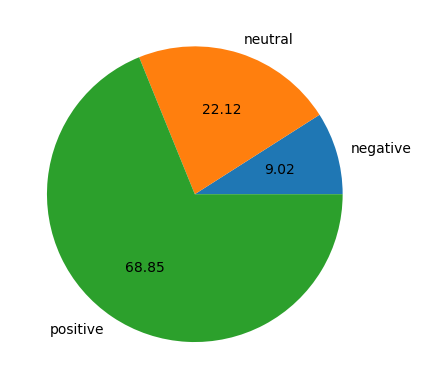

In [95]:
import matplotlib.pyplot as plt

df_results.groupby("sentiment_prediction_label").size().plot(kind='pie', autopct='%.2f')

In [96]:
# function to create plots showing the sentiment for each tweet that contains a mention of a certain entity
def plot_sentiment_by_entity_types(df, entity):
    df["entity_mentioned"] = df["entity_types"].apply(lambda x: entity in x)
    df = df[df["entity_mentioned"]==True]
    df.groupby("sentiment_prediction_label").size().plot(
        kind="pie", 
        autopct="%.2f", 
        title=f"Sentiment in all tweets containing mentions of a {entity}")

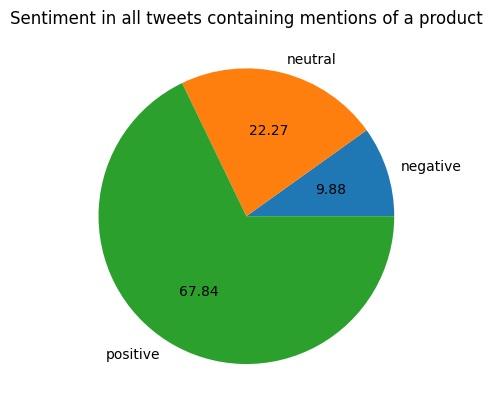

In [97]:
plot_sentiment_by_entity_types(df_results, "product")

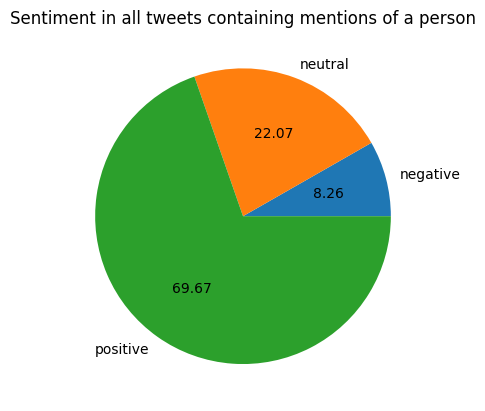

In [98]:
plot_sentiment_by_entity_types(df_results, "person")

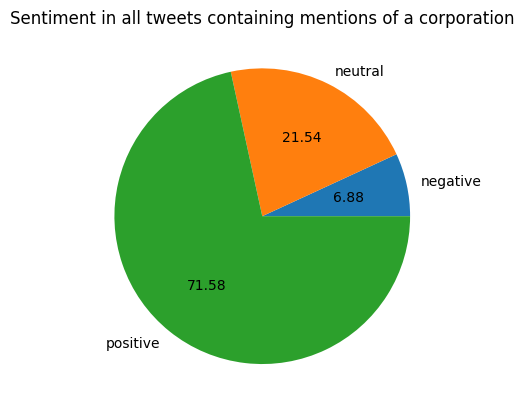

In [99]:
plot_sentiment_by_entity_types(df_results, "corporation")

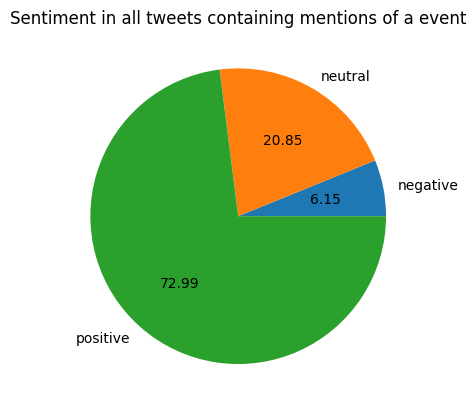

In [100]:
plot_sentiment_by_entity_types(df_results, "event")

possible conclusion: 

postings mentioning products are slightly more negative

posts about persons are more positive

posts containing mentions of corporations are the most positive on average

## Bar plots

In [101]:
unique_entities = []
for index, row in df_results.iterrows():
    for element in row["entity_types"]:
        if element not in unique_entities:
            unique_entities.append(element)

In [102]:
print(unique_entities)

['product', 'location', 'person', 'event', 'corporation', 'group', 'creative_work']


{'product': 0.6548161652993011, 'location': 0.22120935885749013, 'person': 0.2904892130051656, 'event': 0.4691583105439076, 'corporation': 0.6490428441203282, 'group': 0.040109389243391066, 'creative_work': 0.02552415679124886}


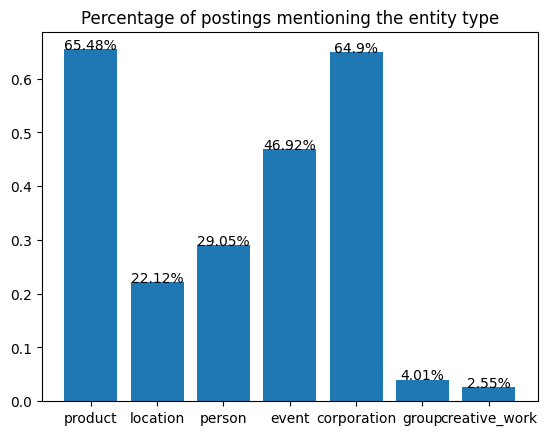

In [103]:
import matplotlib.pyplot as plt

dic = {}
for entity_type in unique_entities:
    df_results["entity_mentioned"] = df_results["entity_types"].apply(lambda x: entity_type in x)
    filtered_df = df_results[df_results["entity_mentioned"]==True]
    percentage = len(filtered_df)/len(df_results)
    dic[entity_type] = percentage

print(dic)

x = range(len(dic))
y = list(dic.values())
plt.bar(x, y, align="center")
plt.xticks(range(len(dic)), list(dic.keys()))

for i in range(len(x)):
    v = f"{round(y[i]*100, 2)}%"
    plt.text(i, y[i], v, ha = "center")

plt.title(f"Percentage of postings mentioning the entity type")
plt.show()

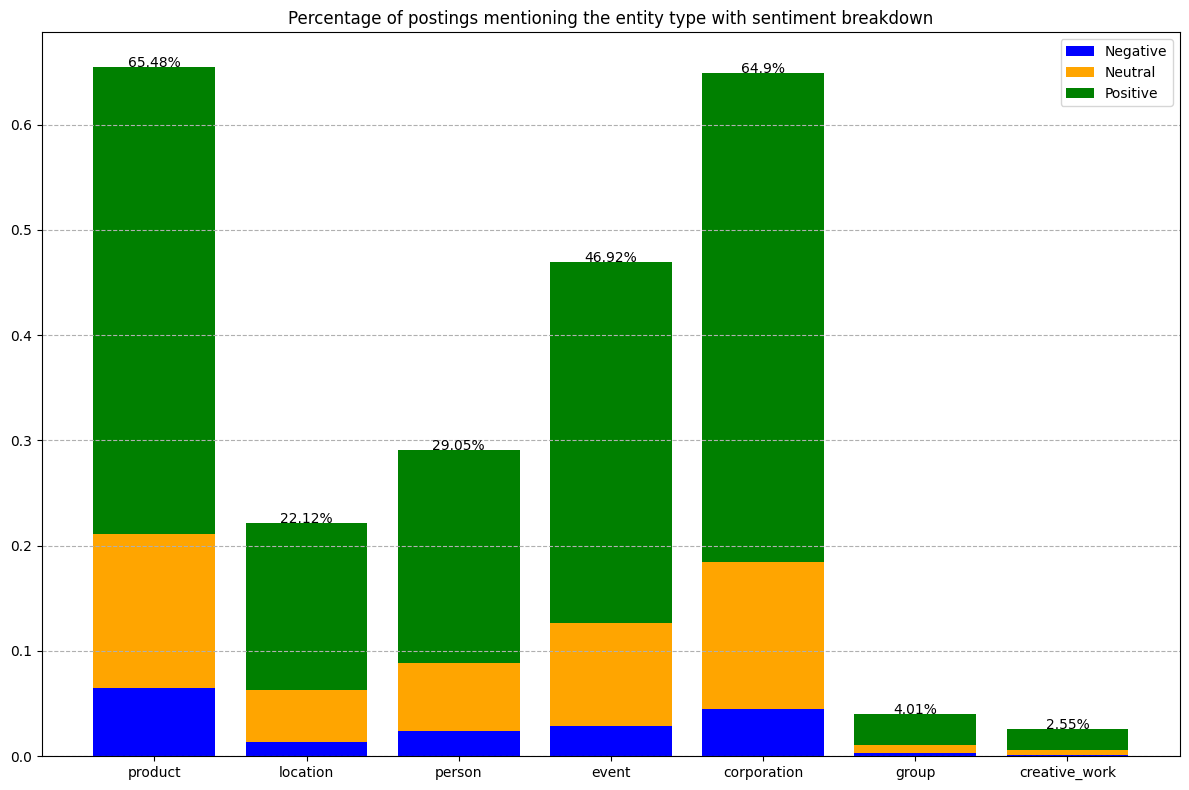

In [104]:
# adding sentiment percentages to the barchart of percentage of entity types
import matplotlib.pyplot as plt

entity_dic = {}
for entity_type in unique_entities:
    df_results["entity_mentioned"] = df_results["entity_types"].apply(lambda x: entity_type in x)
    filtered_df = df_results[df_results["entity_mentioned"]==True]
    percentage = len(filtered_df)/len(df_results)
    entity_dic[entity_type] = percentage

sentiment_dic = {}
for entity_type in unique_entities:
    df_results["entity_mentioned"] = df_results["entity_types"].apply(lambda x: entity_type in x)
    filtered_df = df_results[df_results["entity_mentioned"]==True]
    sentiment_dic[entity_type] = {"negative": 0, "neutral": 0, "positive": 0}

    total_count = len(filtered_df)
    negative_count = len(filtered_df[filtered_df["sentiment_prediction_label"] == "negative"])
    neutral_count = len(filtered_df[filtered_df["sentiment_prediction_label"] == "neutral"])
    positive_count = len(filtered_df[filtered_df["sentiment_prediction_label"] == "positive"])
    
    sentiment_dic[entity_type] = {
        "negative": (negative_count / total_count) * dic[entity_type],
        "neutral": (neutral_count / total_count) * dic[entity_type],
        "positive": (positive_count / total_count) * dic[entity_type]
    }
    
entity_types = list(entity_dic.keys())
x = range(len(entity_types))
total_percentages = list(entity_dic.values())

negative_values = [sentiment_dic[entity]["negative"] for entity in entity_types]
neutral_values = [sentiment_dic[entity]["neutral"] for entity in entity_types]
positive_values = [sentiment_dic[entity]["positive"] for entity in entity_types]

fig, ax = plt.subplots(figsize=(12, 8))

p1 = ax.bar(x, negative_values, align="center", label="Negative", color="blue")
p2 = ax.bar(x, neutral_values, align="center", bottom=negative_values, label="Neutral", color="orange")
p3 = ax.bar(x, positive_values, align="center", 
            bottom=[p+n for p, n in zip(negative_values, neutral_values)], 
            label="Positive", color="green")

for i, percentage in enumerate(total_percentages):
    v = f"{round(percentage*100, 2)}%"
    ax.text(i, percentage, v, ha="center")

ax.set_xticks(x)
ax.set_xticklabels(entity_types)
ax.set_title("Percentage of postings mentioning the entity type with sentiment breakdown")
ax.legend()
ax.grid(axis="y", linestyle="--")

plt.tight_layout()
plt.show()

In [105]:
# bar chart with a bar for every entity, displaying the percentage of postings with a certain sentiment that this entity was mentioned in 
# (e.g. how much percent of all positive/negative/neutral postings contain mentions of an entity)
import matplotlib.pyplot as plt 

def plot_sentiment_barchart_by_entity(df, sentiment):
    dic = {}
    for entity_type in unique_entities:
        df["entity_mentioned"] = df["entity_types"].apply(lambda x: entity_type in x)
        filtered_df = df[(df["sentiment_prediction_label"]==sentiment) & (df["entity_mentioned"]==True)]
        percentage = len(filtered_df)/len(df[df["sentiment_prediction_label"]==sentiment])
        dic[entity_type] = percentage

    print(dic)
    
    x = range(len(dic))
    y = list(dic.values())
    plt.bar(x, y, align="center")
    plt.xticks(range(len(dic)), list(dic.keys()))

    for i in range(len(x)):
        v = f"{round(y[i]*100, 2)}%"
        plt.text(i, y[i], v, ha = "center")
    
    plt.title(f"Percentage of {sentiment} postings mentioning the type of entity")
    plt.show()

{'product': 0.6451897616946161, 'location': 0.23036187113857018, 'person': 0.293909973521624, 'event': 0.49735216240070607, 'corporation': 0.6747572815533981, 'group': 0.04324801412180053, 'creative_work': 0.02824360105913504}


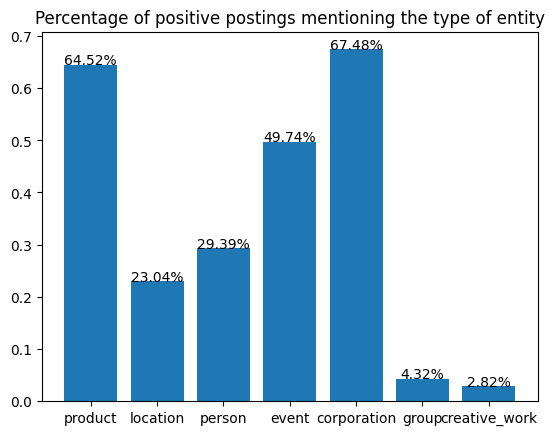

In [106]:
plot_sentiment_barchart_by_entity(df_results, "positive")

{'product': 0.7171717171717171, 'location': 0.1447811447811448, 'person': 0.265993265993266, 'event': 0.31986531986531985, 'corporation': 0.494949494949495, 'group': 0.037037037037037035, 'creative_work': 0.010101010101010102}


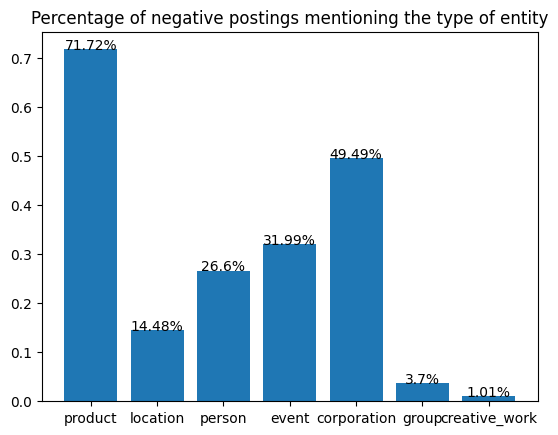

In [107]:
plot_sentiment_barchart_by_entity(df_results, "negative")

{'product': 0.6593406593406593, 'location': 0.2239010989010989, 'person': 0.28983516483516486, 'event': 0.4423076923076923, 'corporation': 0.6318681318681318, 'group': 0.03159340659340659, 'creative_work': 0.023351648351648352}


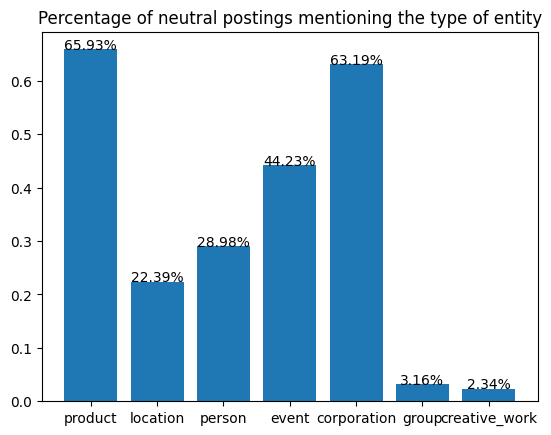

In [108]:
plot_sentiment_barchart_by_entity(df_results, "neutral")

possible conclusions:

most positive postings contain mention of a corporation

most negative postings contain mention of a product

negative postings have the highest percentage of product-mentions of all sentiments

## Word clouds

In [109]:
# creating wordclouds
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
stopwords = set(STOPWORDS)

#adding frequently mentioned uninteresting words to the stopwords to not be included in the wordcloud
stopwords.update(["mention", "rt", "link", "app", "store", "time", "sxsw", "sxswi", "quot"])

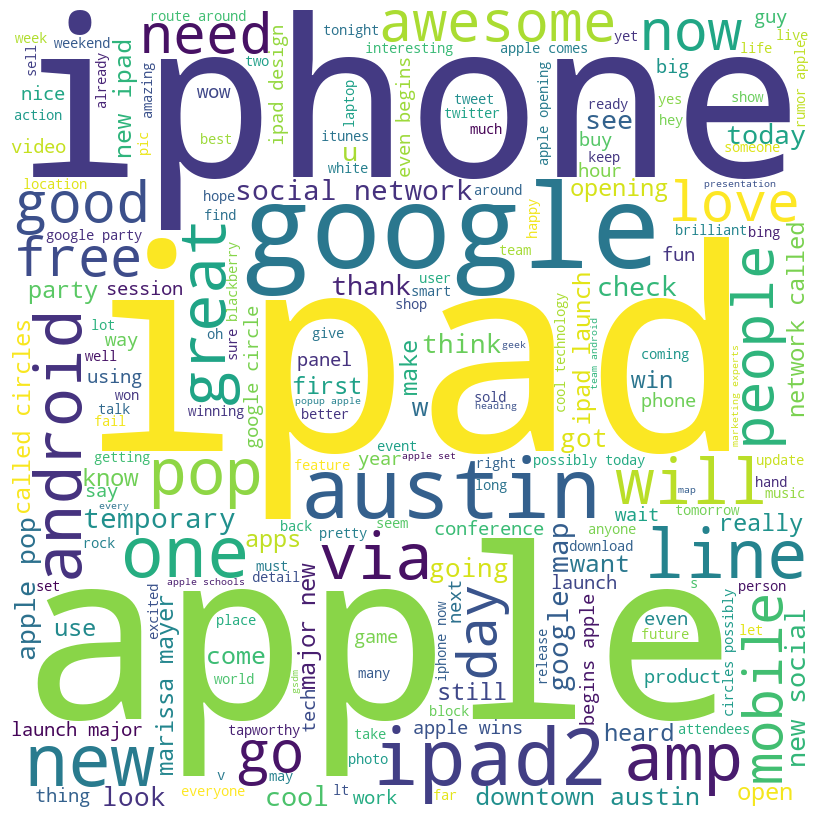

In [111]:
words = ""

for val in df_results.tweet_text:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color = "white",
                stopwords = stopwords,
                min_font_size = 10).generate(words)
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [112]:
# function for creating wordcloud built only with 
# postings containing a certain entity and labeled with a certain sentiment

def create_wordcloud(df, entity, sentiment, text_col="tweet_text"):
    words = ""

    df["entity_mentioned"] = df["entity_types"].apply(lambda x: entity in x)
    filtered_df = df[(df["sentiment_prediction_label"]==sentiment) & (df["entity_mentioned"]==True)]

    for val in filtered_df[text_col]:
        val = str(val)
        tokens = val.split()
        
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width=800, 
                          height=800,
                        background_color="white",
                        stopwords=stopwords,
                        min_font_size=10).generate(words)
                    
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.title(f"Wordcloud of all {sentiment} postings mentioning a {entity}")
    plt.show()

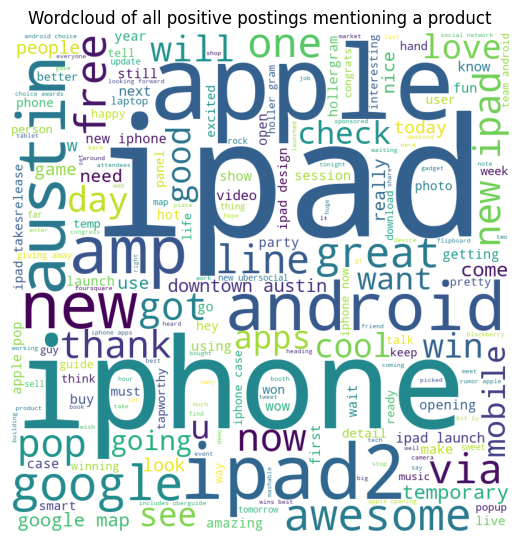

In [113]:
create_wordcloud(df_results, "product", "positive")

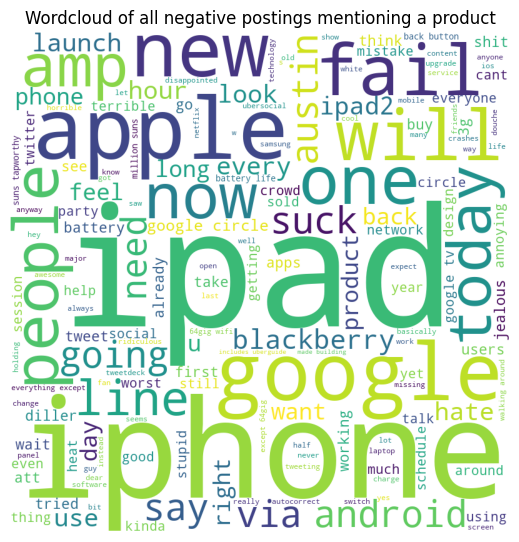

In [114]:
create_wordcloud(df_results, "product", "negative")

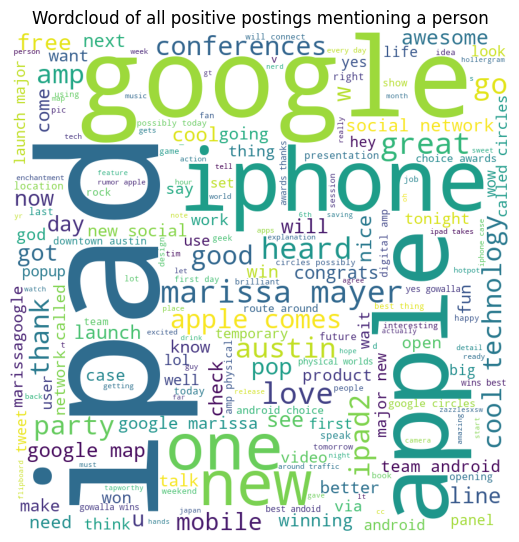

In [115]:
create_wordcloud(df_results, "person", "positive")

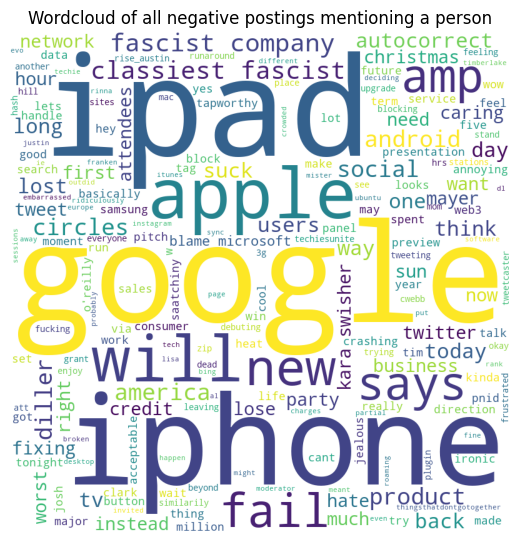

In [116]:
create_wordcloud(df_results, "person", "negative")

possible conclusions:

product - positive: interesting, original, amazing, great, pretty, hot

product - negative: worst, irrelevant, frustrating

## Heatmaps

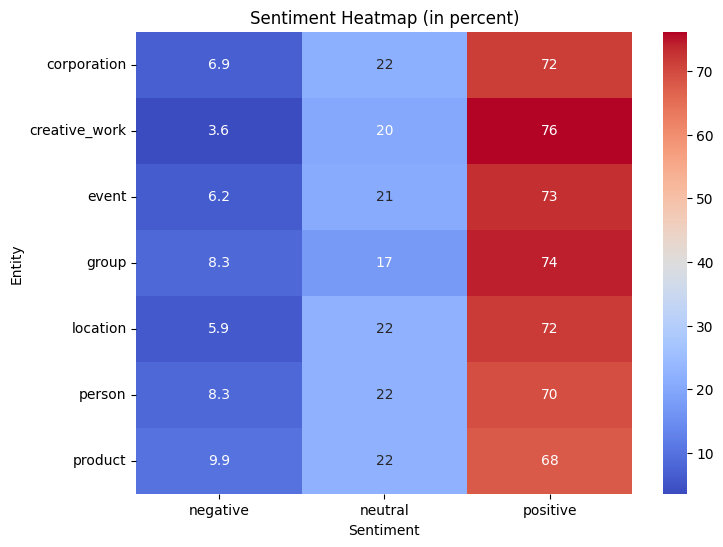

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

df_results_exploded = df_results.explode("entity_types")
sentiment_counts = df_results_exploded.groupby(["entity_types", "sentiment_prediction_label"]).size().unstack(fill_value=0)
sentiment_proportions = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

#heatmap_data = df_results.groupby(['entity_types', 'sentiment_prediction']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_proportions, annot=True, cmap="coolwarm", cbar=True)
plt.title("Sentiment Heatmap (in percent)")
plt.xlabel("Sentiment")
plt.ylabel("Entity")

plt.show()

In [118]:
df_results.head()

tweet_text  sentiment_prediction  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...                     1   
1  @jessedee Know about @fludapp ? Awesome iPad/i...                     2   
2  @swonderlin Can not wait for #iPad 2 also. The...                     2   
3  @sxsw I hope this year's festival isn't as cra...                     1   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...                     2   

                                            entities  \
0  [{'word': '.', 'entity': 'B-person'}, {'word':...   
1  [{'word': '@', 'entity': 'B-person'}, {'word':...   
2  [{'word': '@', 'entity': 'B-person'}, {'word':...   
3  [{'word': 'Ġfestival', 'entity': 'B-event'}, {...   
4  [{'word': 'xt', 'entity': 'I-event'}, {'word':...   

                            entity_types sentiment_prediction_label  \
0            [product, location, person]                    neutral   
1  [product, event, corporation, person]                   positive   
2               [product, event, person]                   positive   
3                       [product, event]                    neutral   
4           [event, corporation, person]                   positive   

   entity_mentioned  
0              True  
1              True  
2              True  
3             False  
4              True

possible conclusions:

the large majority of predictions by the model in this case are "positive" 

model in general predicts relatively similar regardless of entity types in this case

posts containing mentions of a product are labelled "negative" most often

## Avg sentiment bar charts

In [119]:
# average sentiment of all posts mentioning a certain entity? dashboard style?

def average_sentiment_for_all_entity_types(df):
    avg_sentiments = {}
    
    for type in unique_entities:
        df["entity_mentioned"] = df["entity_types"].apply(lambda x: type in x)
        df = df[df["entity_mentioned"]==True]
        avg_sentiments[type] = df.loc[:, "sentiment_prediction"].mean()

    return avg_sentiments

avg_sentiments_dict = average_sentiment_for_all_entity_types(df_results)
print(avg_sentiments_dict)

{'product': 1.5795823665893272, 'location': 1.6583143507972664, 'person': 1.6454545454545455, 'event': 1.6956521739130435, 'corporation': 1.7391304347826086, 'group': 2.0, 'creative_work': nan}


C:\Users\hausb\AppData\Local\Temp\ipykernel_18224\3229249494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["entity_mentioned"] = df["entity_types"].apply(lambda x: type in x)


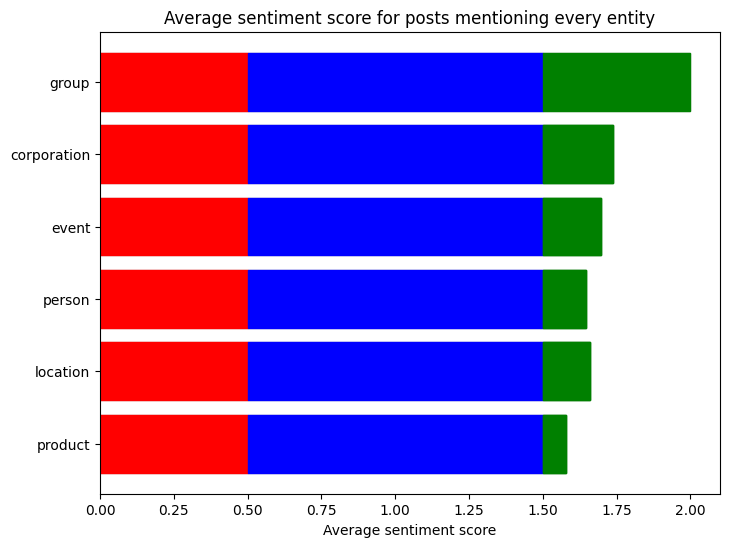

In [120]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

bar_names = list(avg_sentiments_dict.keys())
bar_lengths = list(avg_sentiments_dict.values())

segment_positions = [0, 0.5, 1.5, 2.0]  
colors = ["red", "blue", "green"]  

plt.figure(figsize=(8, 6))
ax = plt.gca() 

plt.barh(bar_names, bar_lengths, color="gray", edgecolor="black", alpha=0.3)  

for y, total_length in enumerate(bar_lengths):
    for i in range(len(segment_positions) - 1): 
        start, end = segment_positions[i], segment_positions[i + 1]
        segment_length = end - start  

        if total_length >= end:  
            rect = patches.Rectangle((start, y - 0.4), segment_length, 0.8, color=colors[i])
            ax.add_patch(rect)
        elif total_length > start:
            rect = patches.Rectangle((start, y - 0.4), total_length - start, 0.8, color=colors[i])
            ax.add_patch(rect)
    
    if total_length > 1.5 and total_length < 2.0:
        remaining_length = total_length - 1.5  
        rect = patches.Rectangle((1.5, y - 0.4), remaining_length, 0.8, color="green")
        ax.add_patch(rect)

plt.title("Average sentiment score for posts mentioning every entity")
plt.xlabel("Average sentiment score")
#plt.gca().invert_yaxis()  # changes order of bars to ascending
plt.show()

# 2nd visualization round with new data

## processing results

In [121]:
import pandas as pd
df_tbt = pd.read_json("tweets_bigtech_10k_application_afterSA.json", orient="records")
df_tbt.head()

text  \
0  Microsoft Build 2020: Empowering developers to...   
1  I will do photoshop editing retouching documen...   
2  #Laney #Amps 🎶 Will Steal Your #Face Right Off...   
3  RT @ophierian_vp: Geralt &amp; Aerondight Silv...   
4  #Google, Amazon funnel at least $25 million to...   

                                              tokens  labels  \
0  [Microsoft, Build, 2020:, Empowering, develope...       1   
1  [I, will, do, photoshop, editing, retouching, ...       1   
2  [#Laney, #Amps, 🎶, Will, Steal, Your, #Face, R...       0   
3  [RT, @ophierian_vp:, Geralt, &amp;, Aerondight...       1   
4  [#Google,, Amazon, funnel, at, least, $25, mil...       0   

                                           bert_pred  bert_pred_sa  
0  [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             2  
1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             1  
2  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             0  
3  [10, 10, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10...             1  
4  [10, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             0

In [122]:
# creating prediction labels column

entity_dict_sm = {
    0: "B-corporation",
    1: "B-event",
    2: "B-location",
    3: "B-person",
    4: "B-product",
    5: "I-corporation",
    6: "I-event",
    7: "I-location",
    8: "I-person",
    9: "I-product",
    10: "O"
}

label_list = list(entity_dict_sm.values())
label_to_id = {label: i for i, label in enumerate(label_list)}
id_to_label = {i: label for label, i in label_to_id.items()}

df_tbt["ner_labels"] = df_tbt["bert_pred"].apply(lambda x:[id_to_label[i] for i in x])
df_tbt.head()

text  \
0  Microsoft Build 2020: Empowering developers to...   
1  I will do photoshop editing retouching documen...   
2  #Laney #Amps 🎶 Will Steal Your #Face Right Off...   
3  RT @ophierian_vp: Geralt &amp; Aerondight Silv...   
4  #Google, Amazon funnel at least $25 million to...   

                                              tokens  labels  \
0  [Microsoft, Build, 2020:, Empowering, develope...       1   
1  [I, will, do, photoshop, editing, retouching, ...       1   
2  [#Laney, #Amps, 🎶, Will, Steal, Your, #Face, R...       0   
3  [RT, @ophierian_vp:, Geralt, &amp;, Aerondight...       1   
4  [#Google,, Amazon, funnel, at, least, $25, mil...       0   

                                           bert_pred  bert_pred_sa  \
0  [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             2   
1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             1   
2  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             0   
3  [10, 10, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10...             1   
4  [10, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             0   

                                          ner_labels  
0  [B-corporation, O, O, O, O, O, O, O, O, O, O, ...  
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
3  [O, O, B-person, O, O, O, O, O, O, O, O, O, O,...  
4  [O, B-corporation, O, O, O, O, O, O, O, O, O, ...

In [123]:
def get_types_from_list(lst):
    r = []
    for entry in lst:
        if entry != "O":
            parts = entry.split("-", 1)
            if len(parts) > 1:
                entity_type = parts[1]
                if entity_type not in r:
                    r.append(entity_type)
    return r

df_tbt["entity_types"] = df_tbt["ner_labels"].apply(get_types_from_list)

df_tbt.head()

text  \
0  Microsoft Build 2020: Empowering developers to...   
1  I will do photoshop editing retouching documen...   
2  #Laney #Amps 🎶 Will Steal Your #Face Right Off...   
3  RT @ophierian_vp: Geralt &amp; Aerondight Silv...   
4  #Google, Amazon funnel at least $25 million to...   

                                              tokens  labels  \
0  [Microsoft, Build, 2020:, Empowering, develope...       1   
1  [I, will, do, photoshop, editing, retouching, ...       1   
2  [#Laney, #Amps, 🎶, Will, Steal, Your, #Face, R...       0   
3  [RT, @ophierian_vp:, Geralt, &amp;, Aerondight...       1   
4  [#Google,, Amazon, funnel, at, least, $25, mil...       0   

                                           bert_pred  bert_pred_sa  \
0  [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             2   
1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             1   
2  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             0   
3  [10, 10, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10...             1   
4  [10, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             0   

                                          ner_labels   entity_types  
0  [B-corporation, O, O, O, O, O, O, O, O, O, O, ...  [corporation]  
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...             []  
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...             []  
3  [O, O, B-person, O, O, O, O, O, O, O, O, O, O,...       [person]  
4  [O, B-corporation, O, O, O, O, O, O, O, O, O, ...  [corporation]

In [124]:
df_tbt["entity_types"].explode().value_counts()

entity_types
corporation    1860
product        1714
person         1029
location        653
event            67
Name: count, dtype: int64

In [125]:
df_tbt["sentiment_prediction"] = df_tbt["bert_pred_sa"].replace({0 : "negative", 1 : "neutral", 2 : "positive"})

## General plots

In [126]:
plot_sentiment_by_entity_types(df_tbt, "product")

KeyError: 'sentiment_prediction_label'

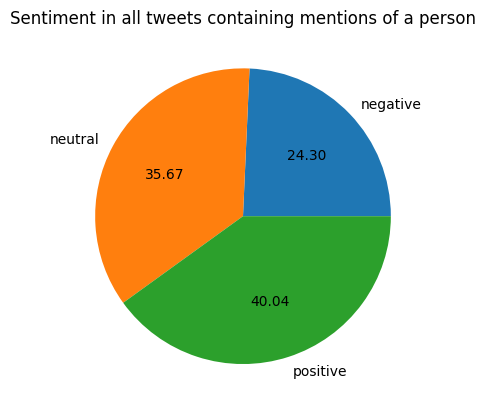

In [ ]:
plot_sentiment_by_entity_types(df_tbt, "person")

In [ ]:
unique_entities = ["corporation", "product", "person", "location", "event"]

{'corporation': 0.19295039164490863, 'product': 0.17284595300261096, 'person': 0.10757180156657964, 'location': 0.05195822454308094, 'event': 0.007832898172323759}


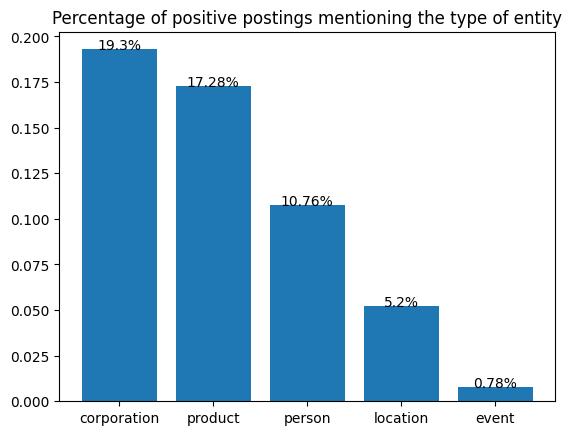

In [ ]:
plot_sentiment_barchart_by_entity(df_tbt, "positive")

{'corporation': 0.16934884872493192, 'product': 0.19064124783362218, 'person': 0.09086407526615499, 'location': 0.07105719237435008, 'event': 0.004704134686803664}


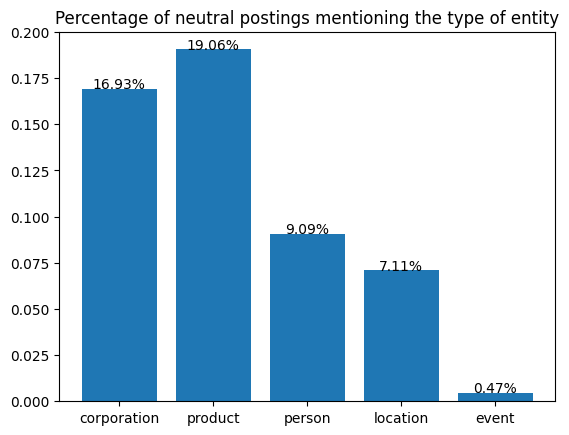

In [ ]:
plot_sentiment_barchart_by_entity(df_tbt, "neutral")

{'corporation': 0.2050680431722196, 'product': 0.1323322383857344, 'person': 0.11731581417175035, 'location': 0.07836696386672924, 'event': 0.008446738620366025}


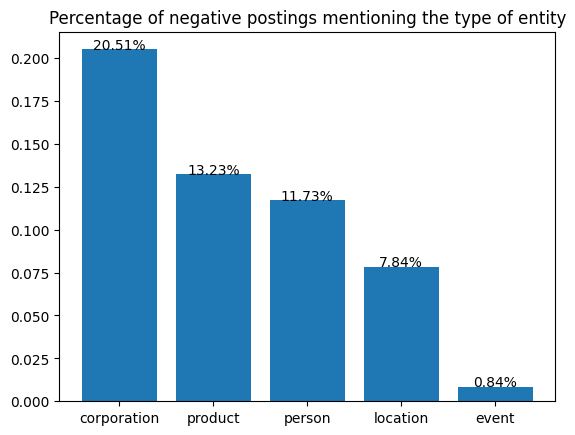

In [ ]:
plot_sentiment_barchart_by_entity(df_tbt, "negative")

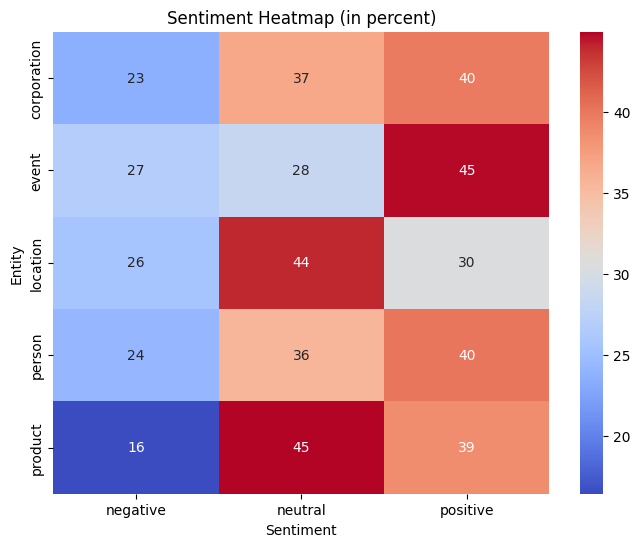

In [ ]:
df_tbt_exploded = df_tbt.explode("entity_types")
sentiment_counts = df_tbt_exploded.groupby(["entity_types", "sentiment_prediction"]).size().unstack(fill_value=0)
sentiment_proportions = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_proportions, annot=True, cmap="coolwarm", cbar=True)
plt.title("Sentiment Heatmap (in percent)")
plt.xlabel("Sentiment")
plt.ylabel("Entity")

plt.show()

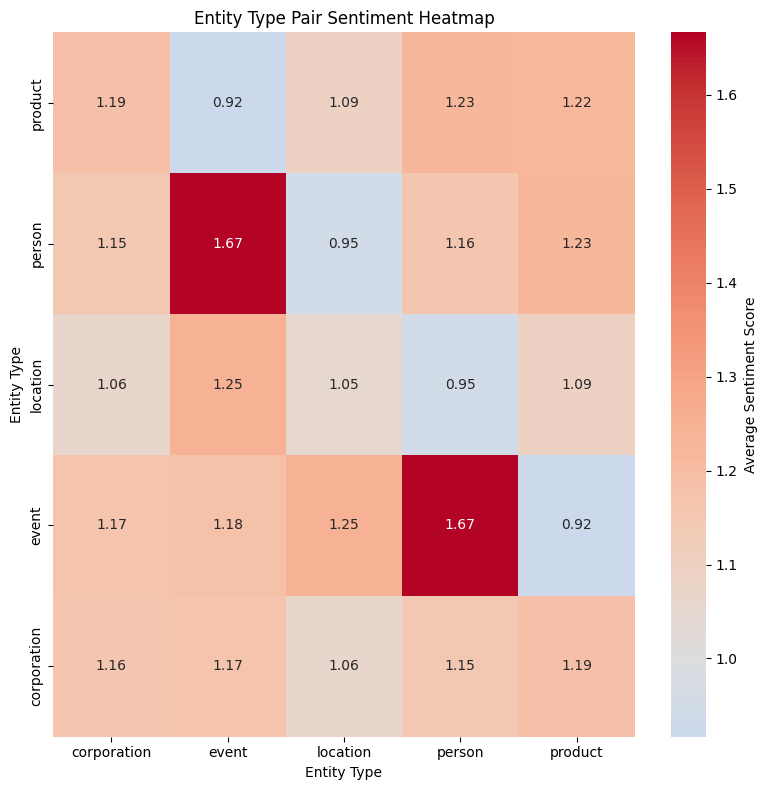

In [127]:
# new heatmap approach with pairs of entity types 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

all_entity_types = sorted(set([entity for sublist in df_tbt['entity_types'] for entity in sublist]))

sentiment_matrix = pd.DataFrame(
    index=all_entity_types,
    columns=all_entity_types,
    dtype=float
)

for i, type1 in enumerate(all_entity_types):
    for j, type2 in enumerate(all_entity_types):
        if i <= j:
            mask = df_tbt['entity_types'].apply(lambda x: type1 in x and type2 in x)
            if mask.sum() > 0:
                avg_sentiment = df_tbt.loc[mask, 'bert_pred_sa'].mean()
                sentiment_matrix.loc[type1, type2] = avg_sentiment
                if i != j:  
                    sentiment_matrix.loc[type2, type1] = avg_sentiment

sentiment_matrix_aligned = sentiment_matrix.iloc[::-1]

plt.figure(figsize=(8, 8))
sns.heatmap(
    sentiment_matrix_aligned,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=1, # center at 1 because values range from 0 to 2
    cbar_kws={'label': 'Average Sentiment Score'}
)
plt.title("Entity Type Pair Sentiment Heatmap")
plt.xlabel("Entity Type")
plt.ylabel("Entity Type")

plt.tight_layout()
plt.show()

In [ ]:
df_tbt.head()

text  \
0  Microsoft Build 2020: Empowering developers to...   
1  I will do photoshop editing retouching documen...   
2  #Laney #Amps 🎶 Will Steal Your #Face Right Off...   
3  RT @ophierian_vp: Geralt &amp; Aerondight Silv...   
4  #Google, Amazon funnel at least $25 million to...   

                                              tokens  labels  \
0  [Microsoft, Build, 2020:, Empowering, develope...       1   
1  [I, will, do, photoshop, editing, retouching, ...       1   
2  [#Laney, #Amps, 🎶, Will, Steal, Your, #Face, R...       0   
3  [RT, @ophierian_vp:, Geralt, &amp;, Aerondight...       1   
4  [#Google,, Amazon, funnel, at, least, $25, mil...       0   

                                           bert_pred  bert_pred_sa  \
0  [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             2   
1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             1   
2  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...             0   
3  [10, 10, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10...             1   
4  [10, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...             0   

                                          ner_labels   entity_types  \
0  [B-corporation, O, O, O, O, O, O, O, O, O, O, ...  [corporation]   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...             []   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...             []   
3  [O, O, B-person, O, O, O, O, O, O, O, O, O, O,...       [person]   
4  [O, B-corporation, O, O, O, O, O, O, O, O, O, ...  [corporation]   

  label_sentiment_prediction  entity_mentioned sentiment_prediction  
0                   positive             False             positive  
1                    neutral             False              neutral  
2                   negative             False             negative  
3                    neutral             False              neutral  
4                   negative             False             negative

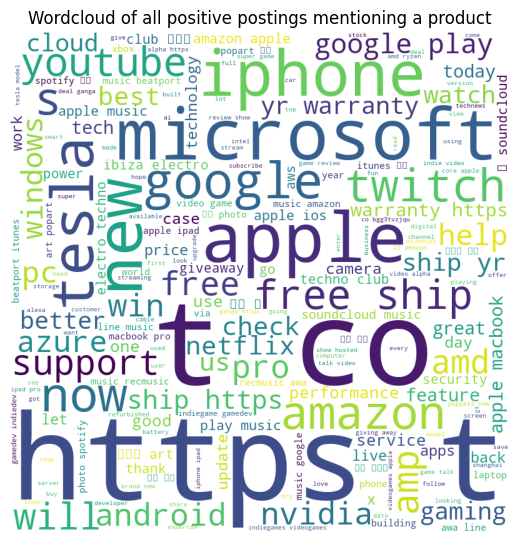

In [ ]:
create_wordcloud(df_tbt, "product", "positive", "text")

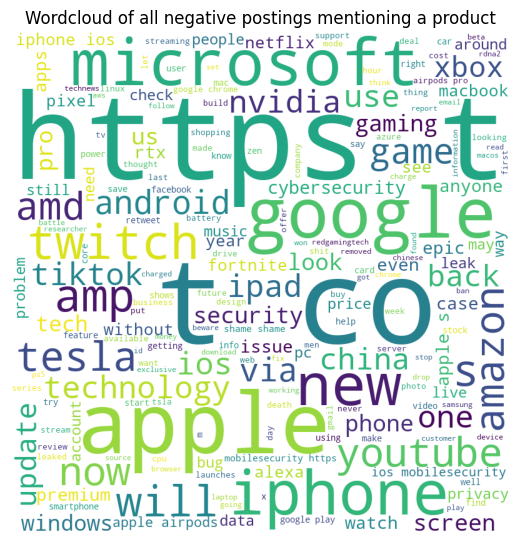

In [ ]:
create_wordcloud(df_tbt, "product", "negative", "text")

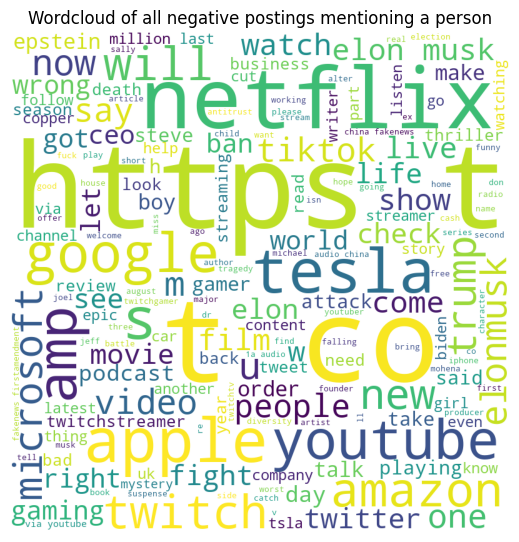

In [ ]:
create_wordcloud(df_tbt, "person", "negative", "text")

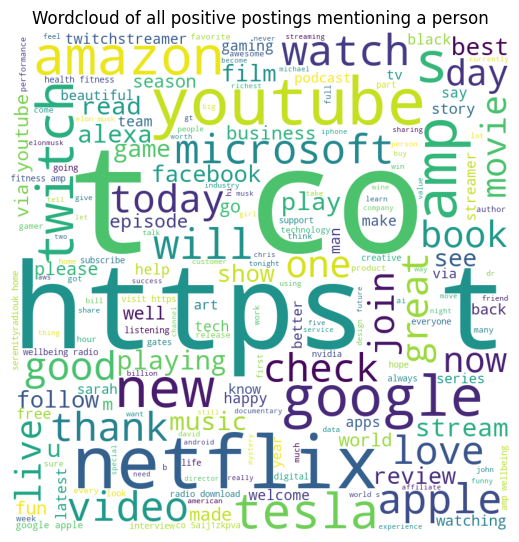

In [ ]:
create_wordcloud(df_tbt, "person", "positive", "text")

## Instance-based Plots

In [129]:
# investigating instances of entities for possible use in new plots
import regex as re

instances_to_remove = ["Mention", "Url", "Computer", "Laptop", "Laptops", "Pc", "Monitor", "2022", "Wifi"]

entity_mapping = {
    "person": {
        "Elon": "Elon Musk",
        "Elonmusk": "Elon Musk",
        "Elon musk": "Elon Musk"
    },
    "location": {
        "Tx" : "Texas",
        "Us" : "Usa"
    },
    "event": {
        "Ces" : "Ces 2022",
        "New year" : "New years" 
    },
    "corporation": {
         "HPIndia" : "HP",
         "Lenovo_in" : "Lenovo",
         "intelcanada" : "Intel"
    }
#         "Dell computers": "Dell",
#         "Dell tech": "Dell Technologies",
#         "Dell technology": "Dell Technologies",
#     },
#     "product": {
#         "Xps13": "XPS 13",
#         "Xps 13plus": "XPS 13 Plus",
#         "Alienware": "Alienware laptop",
#     }
}

def get_instance_dic(df):
    unique_entities = ["corporation", "product", "person", "location", "event"]
    instance_dic = {}
    
    for type in unique_entities:
        type_list = []
        
        for index, row in df.iterrows():
            tokens = row["tokens"]
            labels = row["ner_labels"]
            
            i = 0
            while i < len(labels):
                if labels[i] == f"B-{type}":
                    entity_tokens = [tokens[i]]
                    j = i + 1
                    
                    while j < len(labels) and labels[j] == f"I-{type}":
                        entity_tokens.append(tokens[j])
                        j += 1
                    
                    complete_entity = " ".join(entity_tokens)
                    complete_entity = re.sub(r'[^a-zA-Z0-9\s]', '', complete_entity).capitalize().strip().removesuffix("'s")
                    
                    # applying manual mapping to group select instances together
                    if type in entity_mapping and complete_entity in entity_mapping[type]:
                        complete_entity = entity_mapping[type][complete_entity]
                    
                    if complete_entity not in instances_to_remove:
                        type_list.append(complete_entity)
                    
                    i = j
                else:
                    i += 1
        
        instance_dic[type] = type_list
    
     # remove trailing "s" if instance is already known with 2nd pass through instance_dic to replace "Googles" with "Google"
    for type in instance_dic:
        unique_instances = set(instance_dic[type])  
        new_type_list = []

        for entity in instance_dic[type]:
            if entity.endswith("s"):
                singular_candidate = entity[:-1]  
                if singular_candidate in unique_instances:
                    entity = singular_candidate 
            
            new_type_list.append(entity)

        instance_dic[type] = new_type_list

    return instance_dic

instance_dic = get_instance_dic(df_tbt)
print(instance_dic["product"])
    
for key in instance_dic.keys():
    print(f"Detected instances of {key}: {len(instance_dic[key])}")

['Digibyte', 'Iphone 12 pro', 'Dc fast', 'Chevy bolts', 'Bmw i3s', 'Microsoft ms frontpage 98', 'Cd key', 'Ai dungeon', 'Juicer cup', 'Usb cable', 'Usb adapter car charger', 'Chrome browser', 'Iphone', 'Ipad', 'Apple watch', 'Apple tv', 'Apple music', 'Icloud', 'Arcade', 'Apple tv', '650php', '160php', 'Alexa app', 'Iphone', 'Openshift origin 311 okd', 'Ge colorchanging led night li', 'Tshirts', 'Tesla', '9to5mac', 'Iphone 12 pro rear shell', 'Lidar', '256gb', 'H2', 'Tesla model 3', 'Tesla fantasy', 'Mic model 3', 'Chro', 'Leap frog', 'Rtx 2080 super', 'Apple', 'Google pixel 5', '120hz', 'Mac pro price tracker', 'Airpods', 'Echo dot 3rd', 'Amazon', 'Echo dot', 'Tiktok', 'Tmobile galaxy note9', 'Redmi k20', '256gb', 'Wifi pad pro', 'Gf 3', 'Polestar 2', 'Tesla x p90d', 'Ios 14ipados 14 developer preview beta 5', 'Ck3', 'Twitch 4', 'Iphone', 'Mac', 'Ipad', 'Lenovo thinkpad t440p 14', 'Laptop i7 4600m 8gb', 'Hdd win 10 os rfb', 'Javascript', 'Xbox game pass pc beta', 'Apple iphone 12', 'I

In [130]:
def get_top_instances(instance_dic, top_n=10):
    top_instances = {}
    
    for entity_type, instances in instance_dic.items():
        instance_counts = {}
        for instance in instances:
            instance_counts[instance] = instance_counts.get(instance, 0) + 1
        
        sorted_instances = sorted(instance_counts.items(), key=lambda x: x[1], reverse=True)
        
        top_n_instances = sorted_instances[:top_n]
        
        top_instances[entity_type] = top_n_instances

    return top_instances

top_10_instances = get_top_instances(instance_dic, top_n=10)
print(top_10_instances)

{'corporation': [('Google', 314), ('Microsoft', 215), ('Apple', 212), ('Youtube', 165), ('Netflix', 140), ('Tesla', 132), ('Amazon', 124), ('Twitch', 62), ('Twitter', 53), ('Nvidia', 40)], 'product': [('Iphone', 67), ('Ipad', 25), ('Android', 20), ('Ios 14', 18), ('Ios', 17), ('Tesla', 15), ('Apple', 15), ('Windows 10', 15), ('Youtube', 14), ('Tiktok', 12)], 'person': [('Elon Musk', 39), ('Trump', 14), ('Pez outlaw', 12), ('Jeff bezos', 9), ('Tim cook', 9), ('Musk', 9), ('Sundar pichai', 7), ('Mark zuckerberg', 6), ('Yerin', 6), ('Elon musks', 6)], 'location': [('Usa', 100), ('China', 42), ('India', 38), ('Uk', 25), ('Shanghai', 18), ('Texas', 14), ('Australia', 11), ('America', 11), ('Europe', 10), ('Canada', 9)], 'event': [('Netflix', 3), ('Covid19', 3), ('Xbox games', 2), ('Nba', 2), ('Ndia', 1), ('Un general assembly', 1), ('Witi virtual summit', 1), ('Netflix eve', 1), ('Mbc', 1), ('Indian premier league', 1)]}


{'Iphone': 67, 'Ipad': 25, 'Android': 20, 'Ios 14': 18, 'Ios': 17, 'Tesla': 15, 'Apple': 15, 'Windows 10': 15, 'Youtube': 14, 'Tiktok': 12}


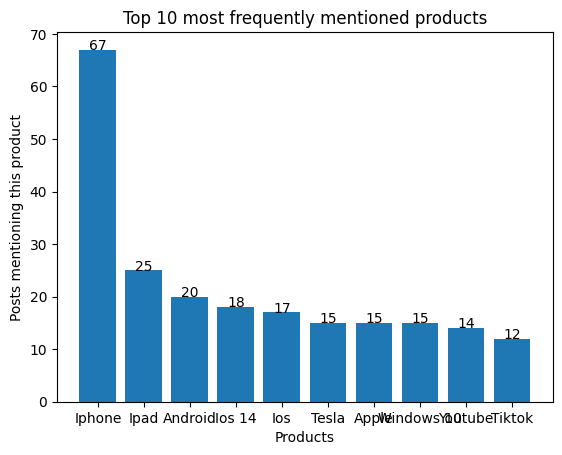

In [131]:
top_10_products = dict(top_10_instances["product"])
print(top_10_products)
x = range(len(top_10_products))
y = list(top_10_products.values())
plt.bar(x, y, align="center")
plt.xticks(range(len(top_10_products)), list(top_10_products.keys()))

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center")

plt.xlabel("Products")
plt.ylabel("Posts mentioning this product")
plt.title(f"Top 10 most frequently mentioned products")
plt.show()

# change color of bar depending on average sentiment

In [ ]:
# adding average sentiment to the dictionary 
def add_sentiment_to_instances(entity_dict, df):
    result = {}
    
    for entity_type, instances in entity_dict.items():
        instances_with_sentiment = []
        instances_not_found = []
        
        for entity, count in instances:
            entity_lower = entity.lower()
            
            # filtering in text-column to detect multi-token instances
            mask = df["text"].apply(lambda x: entity_lower in x.lower())
            
            if mask.sum() > 0:
                avg_sentiment = df.loc[mask, "bert_pred_sa"].mean()
                instances_with_sentiment.append((entity, count, avg_sentiment))
            else:
                instances_not_found.append(entity)
        
        if instances_not_found:
            print(f"{len(instances_not_found)} {entity_type} entities not found in text: {instances_not_found}")
            
        result[entity_type] = instances_with_sentiment
    
    return result

top_10_instances2 = add_sentiment_to_instances(top_10_instances, df_tbt)
print(top_10_instances2)

{'corporation': [('Google', 314, 1.116754617414248), ('Microsoft', 215, 1.2256596906278434), ('Apple', 212, 1.1187181354697742), ('Youtube', 165, 1.2), ('Netflix', 140, 1.0562805872756933), ('Tesla', 132, 1.167808219178082), ('Amazon', 124, 1.1958250497017893), ('Twitch', 62, 1.210160055671538), ('Twitter', 53, 0.9896373056994818), ('Nvidia', 40, 1.1666666666666667)], 'product': [('Iphone', 67, 1.1772908366533865), ('Ipad', 25, 1.2654867256637168), ('Android', 20, 1.2359550561797752), ('Ios 14', 18, 1.04), ('Ios', 17, 1.12109375), ('Tesla', 15, 1.167808219178082), ('Apple', 15, 1.1187181354697742), ('Windows 10', 15, 1.2142857142857142), ('Youtube', 14, 1.2), ('Tiktok', 12, 0.8306451612903226)], 'person': [('Elon Musk', 39, 0.8709677419354839), ('Trump', 14, 0.632183908045977), ('Pez outlaw', 12, 0.94), ('Jeff bezos', 9, 1.5555555555555556), ('Tim cook', 9, 1.0), ('Musk', 9, 1.2110552763819096), ('Sundar pichai', 7, 1.0), ('Mark zuckerberg', 6, 1.0), ('Yerin', 6, 0.6666666666666666), (

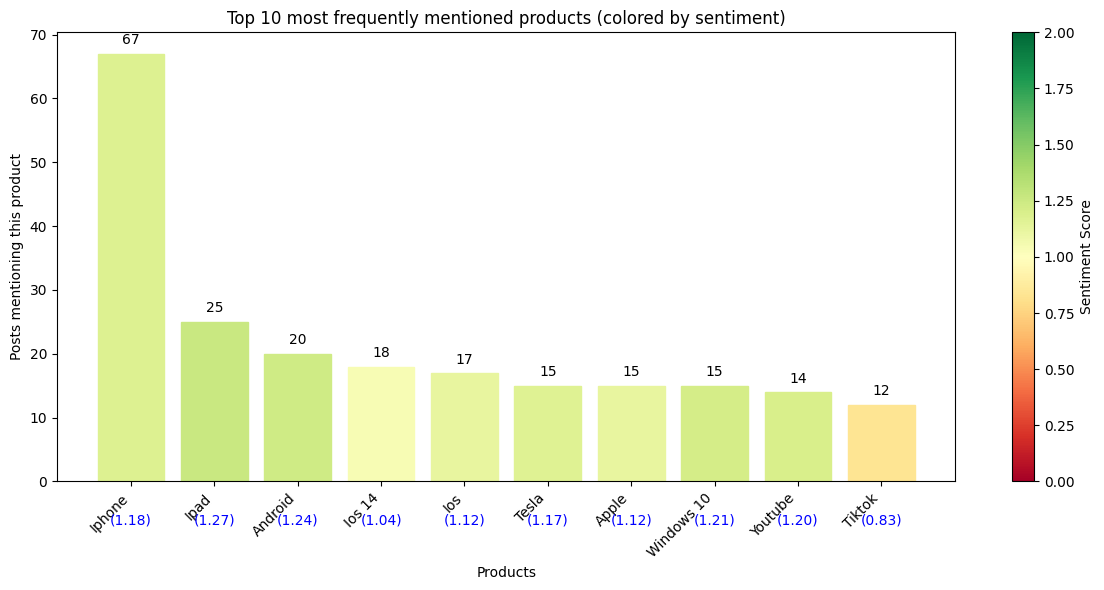

In [133]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def barchart_top10_instances_with_sentiment(entity):
    instances = [item[0] for item in top_10_instances2[entity]]
    counts = [item[1] for item in top_10_instances2[entity]]
    sentiments = [item[2] for item in top_10_instances2[entity]]

    cmap = plt.cm.RdYlGn  
    norm = mcolors.Normalize(vmin=0, vmax=2) # color-range from 0 to 2

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(range(len(instances)), counts, align="center")

    for i, bar in enumerate(bars):
        if np.isnan(sentiments[i]):
            bar.set_color("black")  
        else:
            bar_color = cmap(norm(sentiments[i]))
            bar.set_color(bar_color)

    for i, v in enumerate(counts):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

    for i, sentiment in enumerate(sentiments):
        ax.text(i, -5, f"({sentiment:.2f})", ha='center', va='top', color='blue')

    ax.set_xticks(range(len(instances)))
    ax.set_xticklabels(instances, rotation=45, ha='right')
    ax.set_xlabel(f"{entity.capitalize()}s")
    ax.set_ylabel(f"Posts mentioning this {entity}")
    ax.set_title(f"Top 10 most frequently mentioned {entity}s (colored by sentiment)")

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Sentiment Score')

    plt.tight_layout()
    plt.show()

barchart_top10_instances_with_sentiment("product")

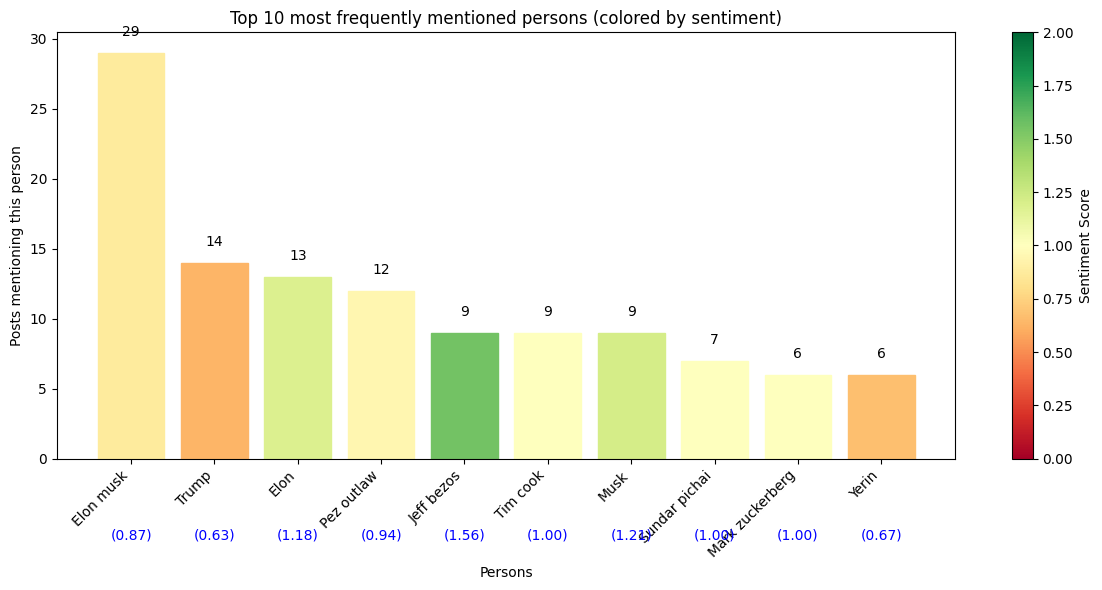

In [ ]:
barchart_top10_instances_with_sentiment("person")

In [ ]:
barchart_top10_instances_with_sentiment("corporation")

NameError: name 'barchart_top10_instances_with_sentiment' is not defined

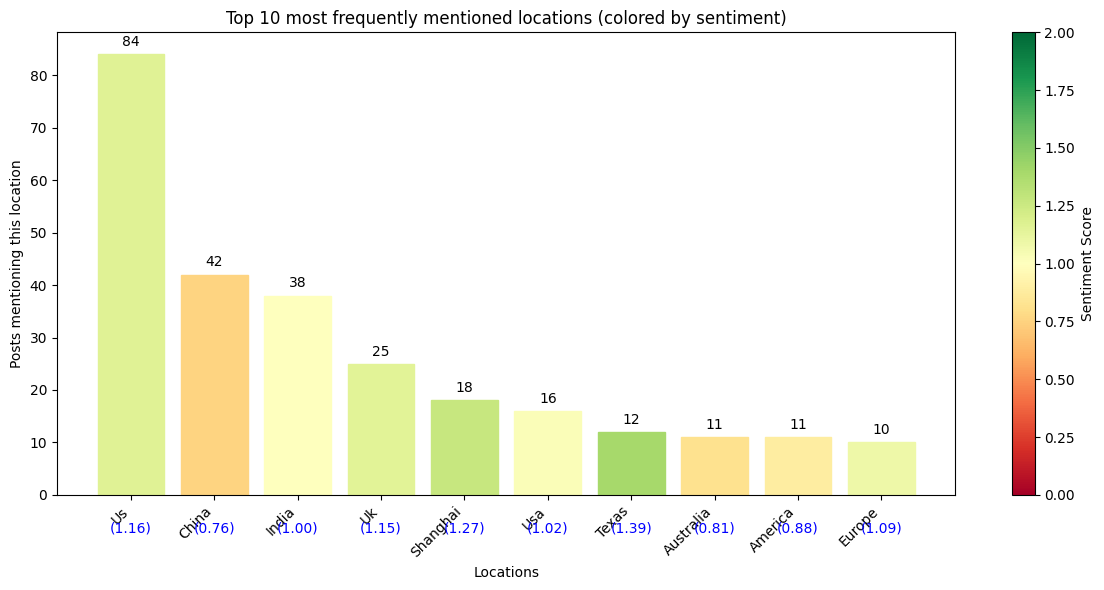

In [ ]:
barchart_top10_instances_with_sentiment("location")

C:\Users\hausb\AppData\Local\Temp\ipykernel_10648\28651517.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


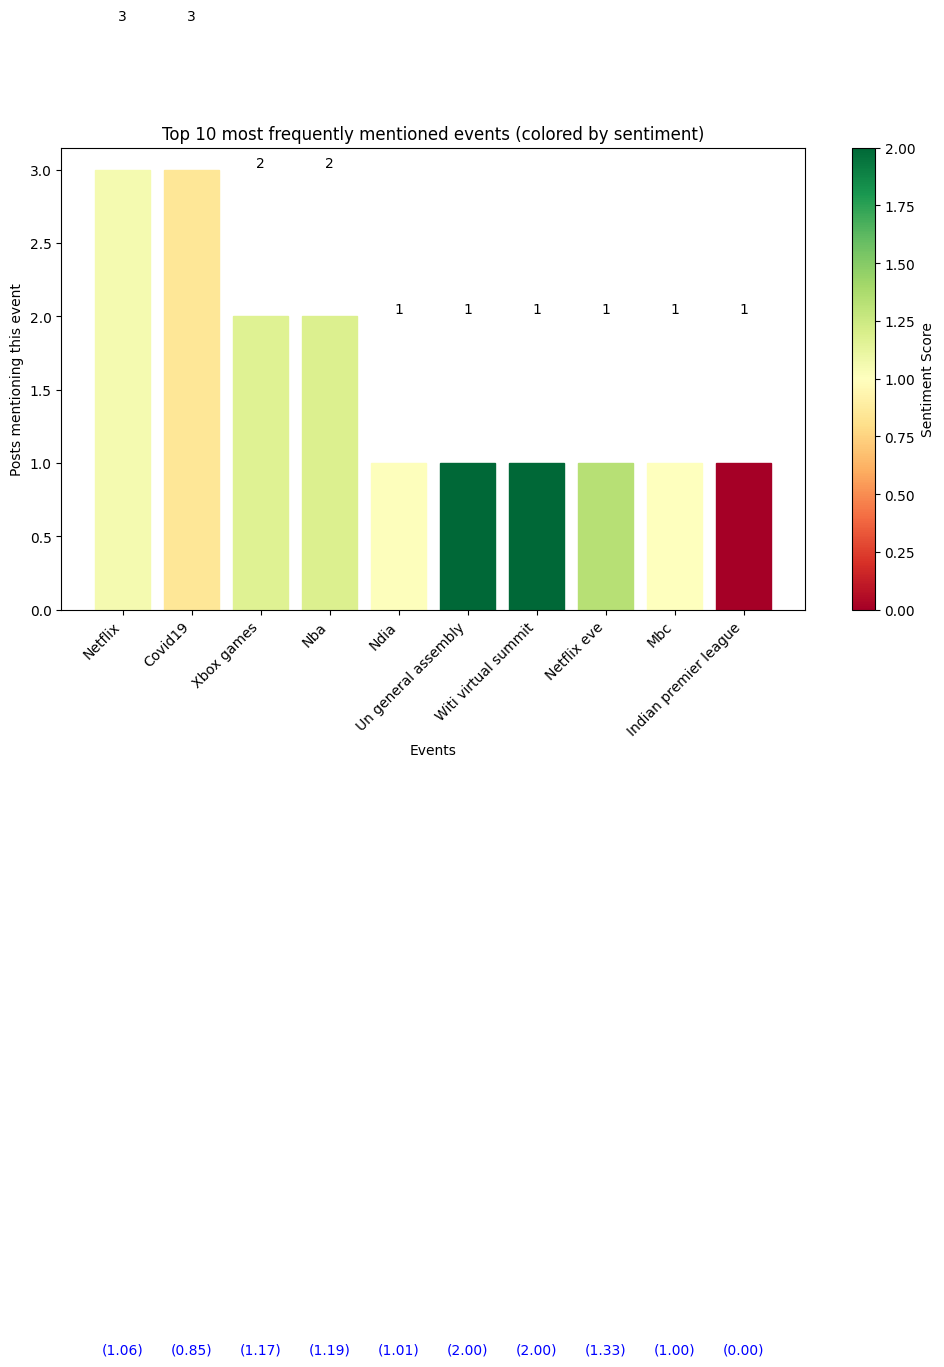

In [ ]:
barchart_top10_instances_with_sentiment("event")

# Time-based plots

In [ ]:
# time based plots with dell data with ner predictions
df_dell = pd.read_json("./analysis_data/dell_afterNER.json", orient="records")
df_dell["Datetime"] = pd.to_datetime(df_dell["Datetime"])
df_dell.head()

Datetime                                               text  \
0 2022-09-30 23:29:15  Logitech Apple Google Microsoft Dell Lenovo #W...   
1 2022-09-30 21:46:35  {{MENTION}} {{MENTION}} {{MENTION}} {{MENTION}...   
2 2022-09-30 21:18:02  As {{MENTION}} celebrates its 40th anniversary...   
3 2022-09-30 20:05:24  Dell your customer service is horrible especia...   
4 2022-09-30 20:03:17  {{MENTION}} Dell Dellcares Dell give the man w...   

                                              tokens sentiment  \
0  [Logitech, Apple, Google, Microsoft, Dell, Len...   neutral   
1  [{{MENTION}}, {{MENTION}}, {{MENTION}}, {{MENT...   neutral   
2  [As, {{MENTION}}, celebrates, its, 40th, anniv...  positive   
3  [Dell, your, customer, service, is, horrible, ...  negative   
4  [{{MENTION}}, Dell, Dellcares, Dell, give, the...   neutral   

                                            ner_tags  \
0  [4, 9, 0, 0, 9, 4, 10, 10, 10, 10, 10, 10, 10,...   
1  [10, 10, 10, 10, 10, 10, 10, 10, 4, 9, 10, 10,...   
2  [10, 10, 10, 10, 10, 10, 3, 8, 10, 10, 10, 10,...   
3  [0, 10, 10, 10, 10, 10, 10, 10, 3, 10, 10, 10,...   
4          [10, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10]   

                                          ner_labels  
0  [B-product, I-product, B-corporation, B-corpor...  
1  [O, O, O, O, O, O, O, O, B-product, I-product,...  
2  [O, O, O, O, O, O, B-person, I-person, O, O, O...  
3  [B-corporation, O, O, O, O, O, O, O, B-person,...  
4  [O, B-corporation, B-corporation, B-corporatio...

In [ ]:
df_dell["sentiment_num"] = df_dell["sentiment"].replace({"negative" : 0, "neutral" : 1, "positive" : 2})

C:\Users\hausb\AppData\Local\Temp\ipykernel_10648\423578849.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dell["sentiment_num"] = df_dell["sentiment"].replace({"negative" : 0, "neutral" : 1, "positive" : 2})


In [ ]:
# filtering out recognized instances of dell mentions from label-column
own_company_names = ["Dell"]

for index, row in df_dell.iterrows():
    tokens = row["tokens"]
    labels = row["ner_labels"]
    for i in range(len(tokens)):
        if tokens[i] in own_company_names and labels[i] != "O":
            labels[i] = "O"
            modified = True
    
    if modified:
        df_dell.at[index, "ner_labels"] = labels

In [ ]:
df_dell["entity_types"] = df_dell["ner_labels"].apply(get_types_from_list)
df_dell["entity_types"].explode().value_counts()

entity_types
product        8515
corporation    7559
person         1533
location       1428
event           700
Name: count, dtype: int64

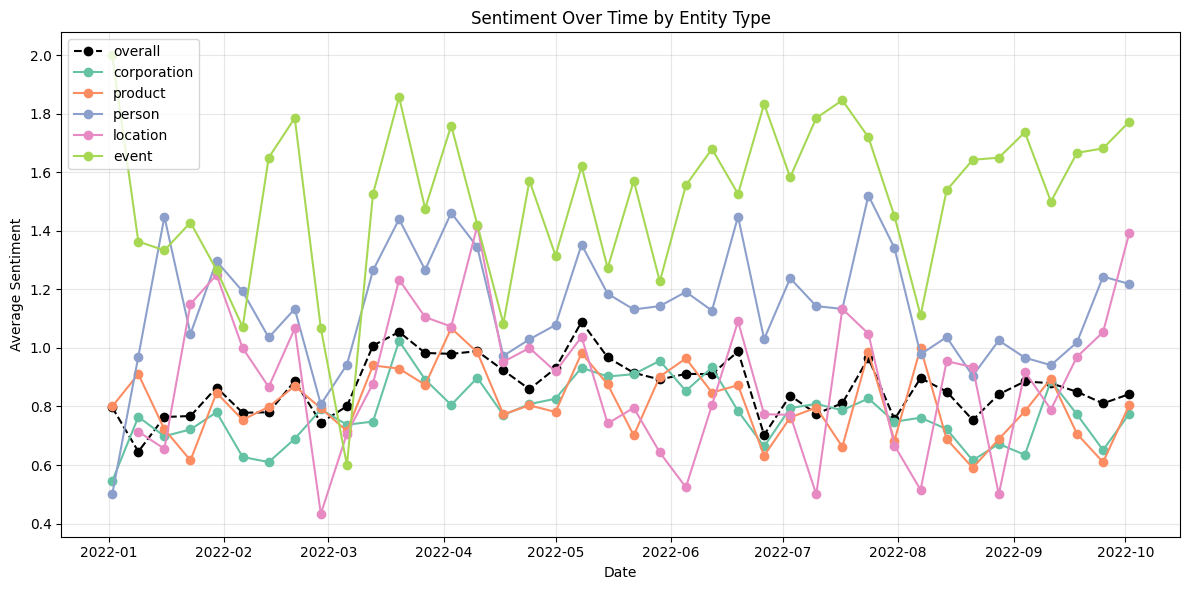

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 6))

# plotting the overall sentiment using the weekly average
weekly_sentiment = df_dell.groupby(pd.Grouper(key="Datetime", freq="W"))["sentiment_num"].mean().reset_index()
plt.plot(weekly_sentiment["Datetime"], weekly_sentiment["sentiment_num"], marker="o", linestyle="dashed", color="black", label="overall")

# plotting the average sentiment for all rows mentioning the entities, adding colors dynamically
colors = sns.color_palette("Set2", n_colors=len(unique_entities))
for i, entity_type in enumerate(unique_entities):
    entity_df = df_dell[df_dell["entity_types"].apply(lambda x: entity_type in x)]
    weekly_sentiment_filtered = entity_df.groupby(pd.Grouper(key="Datetime", freq="W"))["sentiment_num"].mean().reset_index()
    plt.plot(weekly_sentiment_filtered["Datetime"], weekly_sentiment_filtered["sentiment_num"], 
             marker="o", linestyle="-", color=colors[i], label=entity_type)

plt.legend()
plt.title("Sentiment Over Time by Entity Type")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

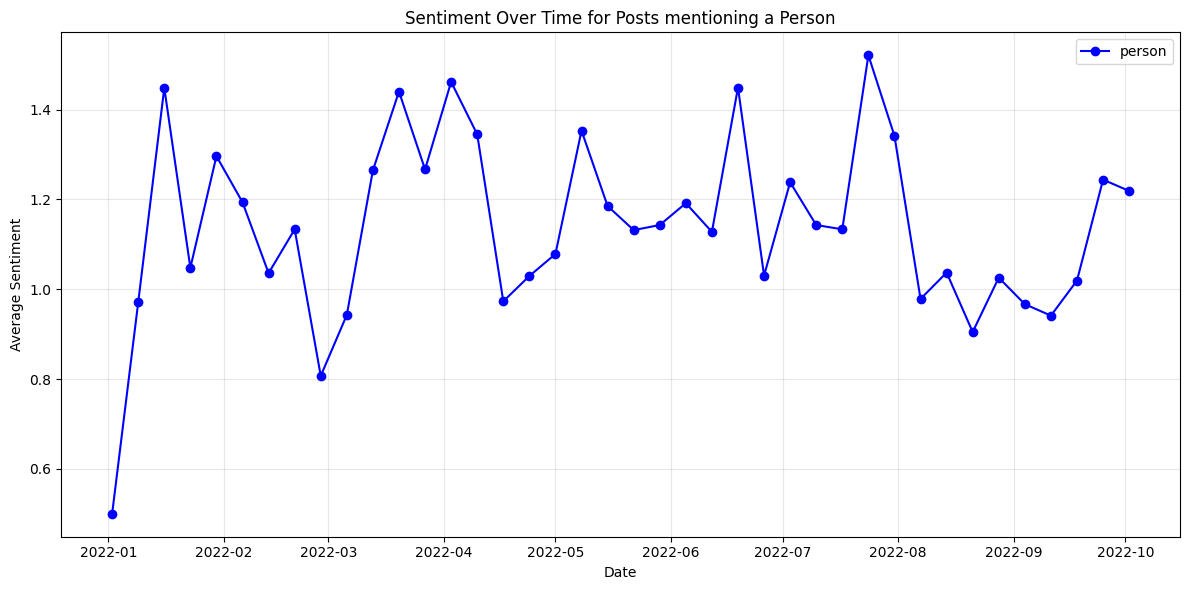

In [ ]:
# function for creating line plot for only posts containing mention of one or multiple entities 
# handles string-input for one entity type and list input for multiple
def plot_sentiment_for_entities_over_time(df, entities):
    plt.figure(figsize=(12, 6))

    if isinstance(entities, str):
        entity_df = df[df["entity_types"].apply(lambda x: entities in x)]

        weekly_sentiment = entity_df.groupby(pd.Grouper(key="Datetime", freq="W"))["sentiment_num"].mean().reset_index()
        plt.plot(weekly_sentiment["Datetime"], weekly_sentiment["sentiment_num"], 
                 marker="o", linestyle="-", color="blue", label=entities)

        plt.legend()
        plt.title(f"Sentiment Over Time for Posts mentioning a {entities.capitalize()}")
        plt.xlabel("Date")
        plt.ylabel("Average Sentiment")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    if isinstance(entities, list):
        entity_df = df[df["entity_types"].apply(lambda x: all(ent in x for ent in entities))]

        weekly_sentiment = entity_df.groupby(pd.Grouper(key="Datetime", freq="W"))["sentiment_num"].mean().reset_index()
        plt.plot(weekly_sentiment["Datetime"], weekly_sentiment["sentiment_num"], 
                 marker="o", linestyle="-", color="blue", label=", ".join([ent for ent in entities]))

        plt.legend()
        plt.title(f"Sentiment Over Time for Posts mentioning {", ".join([ent.capitalize() for ent in entities])}")
        plt.xlabel("Date")
        plt.ylabel("Average Sentiment")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_sentiment_for_entities_over_time(df_dell, "person")

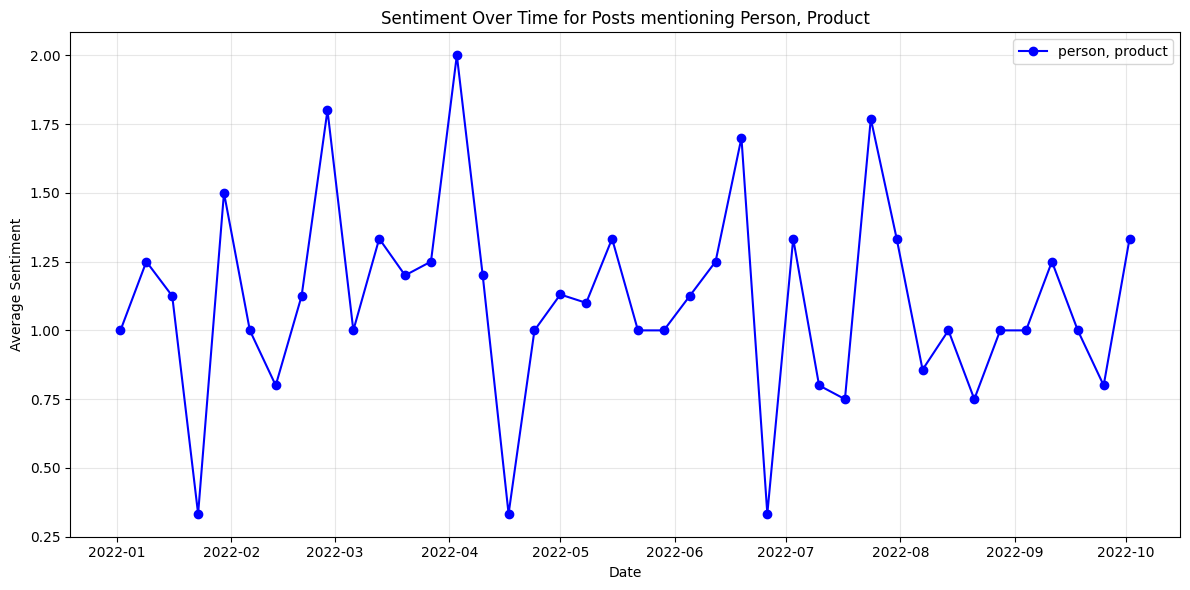

In [ ]:
plot_sentiment_for_entities_over_time(df_dell, ["person", "product"])

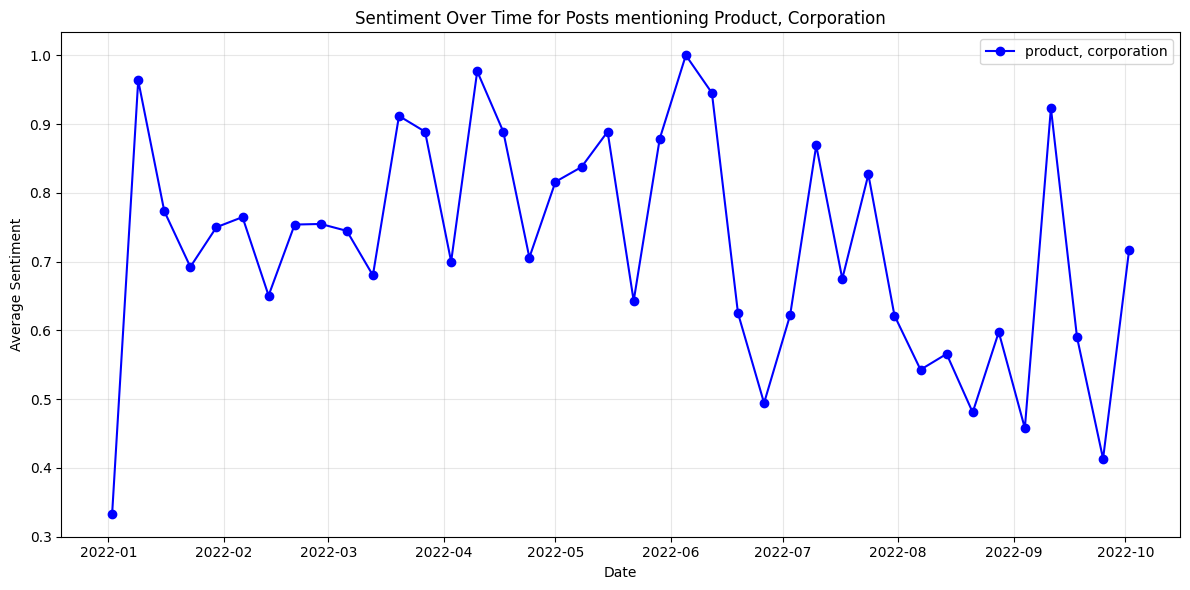

In [ ]:
plot_sentiment_for_entities_over_time(df_dell, ["product", "corporation"])

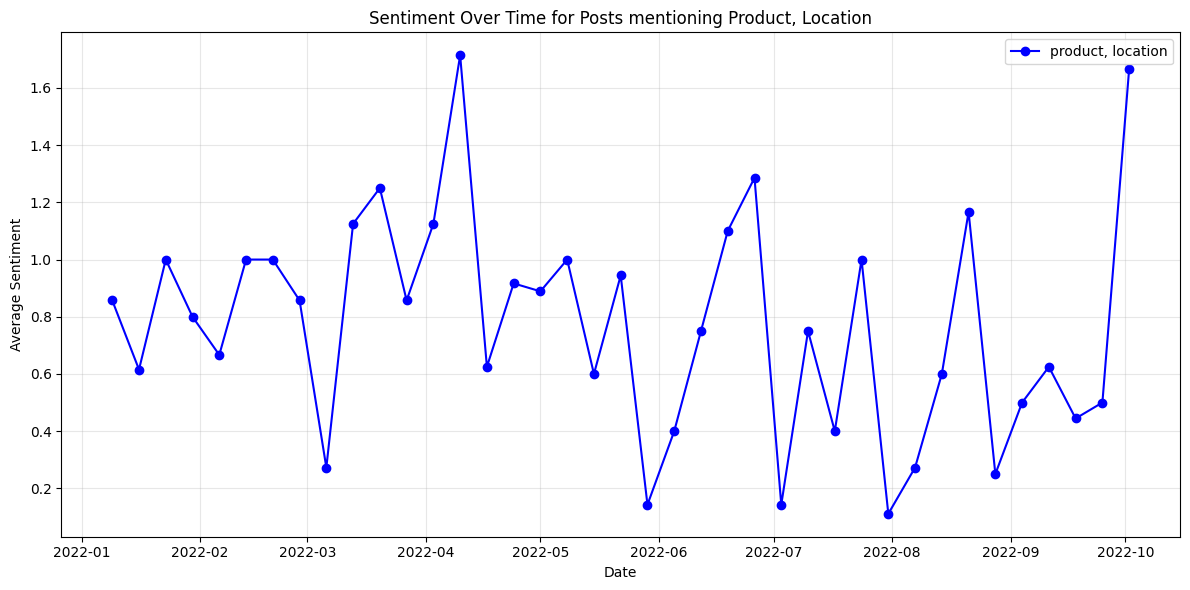

In [ ]:
plot_sentiment_for_entities_over_time(df_dell, ["product", "location"])